In [1]:
import graph
import disease
import pandas as pd
import matplotlib as pyplot
import numpy as np
import collections
%matplotlib inline

/home/students/doorjo01/research/researchEnv/local/lib/python2.7/site-packages/pandas/io/excel.py:626: UserWarning: Installed openpyxl is not supported at this time. Use >=1.6.1 and <2.0.0.
  .format(openpyxl_compat.start_ver, openpyxl_compat.stop_ver))


In [2]:
def makeRanges(d,numColumns):
    res = {}
    keys = d.keys()
    mini = keys[0]
    maxi = keys[len(d)-1]
    diff = maxi - mini
    stepSize = diff/numColumns
    
    currentRange = mini+stepSize
    k = mini
    acc = 0
    for k,v in d.iteritems():
        
        if k < currentRange:
            acc +=v
        else:
            
            res["%.3f" %(currentRange)] = acc
            currentRange += stepSize
            acc =0
    return collections.OrderedDict(sorted(res.items()))

def distGraph(dist):
    '''
    Given a distribution dictionary, this function graphs the distribution
    Include a save option later
    '''
    d = collections.OrderedDict(sorted(dist.items()))
    newD = makeRanges(d,20)
    df = pd.DataFrame.from_dict(newD,orient="index")
    df.plot(kind="bar",title="Distribution Graph with Range",legend=False)

In [3]:
trials = 500
dist = {}
connectionLst = []
for x in range(trials):

    g = graph.Graph(8, .9, 0, 0)   #k,p,r,%infected,%vaccinated
    g.makeVertices(250)         #of people
    g.makeConnections(.01)         #prob they are connected
    r = g.calculateR(True)
    #print(r)
    if r not in dist: #problem with float equality
        dist[r]=1
    else:
        dist[r] += 1


#for vert in g.getVertices():
#    x =len(vert.getConnections())  
#    connectionLst.append(x)
    
#sum(connectionLst)/250.0

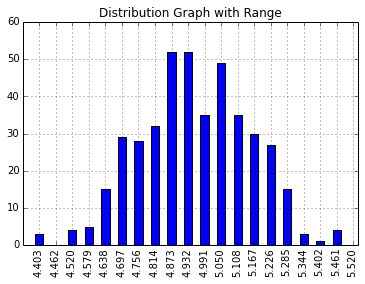

In [4]:
distGraph(dist)

In [27]:
frame = pd.DataFrame.from_dict(dist,orient="index")



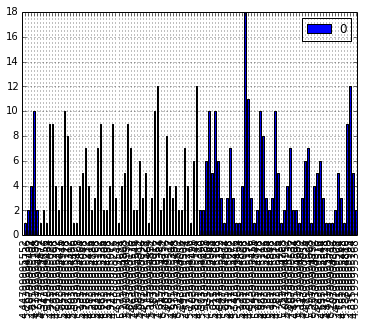

In [28]:
frame.plot(kind="bar")

In [36]:
frame= frame.sort_index()

In [37]:
frame.head()

,0
4.448,1
4.456,2
4.472,1
4.496,2
4.504,1


In [38]:
frame.tail()

,0
5.440,1
5.472,1
5.504,1
5.528,1
5.544,1


In [65]:
import collections

d = collections.OrderedDict(sorted(dist.items()))
#print(d)
def makeRanges(d):
    res = {}
    keys = d.keys()
    mini = keys[0]
    print(mini)
    maxi = keys[len(d)-1]
    diff = maxi - mini
    stepSize = diff/20
    currentRange = mini+stepSize
    k = mini
    acc = 0
    print(currentRange)
    for k,v in d.iteritems():
        
        if k < currentRange:
            acc +=v
        else:
            
            res[currentRange] = acc
            currentRange += stepSize
            acc =0
    return collections.OrderedDict(sorted(res.items()))
    '''as you go through the ordered dict, set the first range tostop at the minimim plus the step size.  
    while the key is less than the current range, accumlate the values. 
    once the key is greater than the currrent range, increment the range by a step size and start over. '''
newD=makeRanges(d)



4.44799995552
4.50279995497


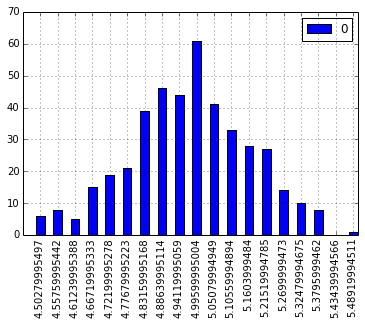

In [67]:
pd.DataFrame.from_dict(newD, orient="index").plot(kind="bar")